In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
%matplotlib inline

### 多次元尺度構成法
Multi Dimensional Scaling(MDS)

#### 簡単な例
次のような点を考える。

In [13]:
points = np.array([[0,0],
                   [3,1],
                   [4,3]]).reshape(3,2)

描画すると、次のような三角形となる。

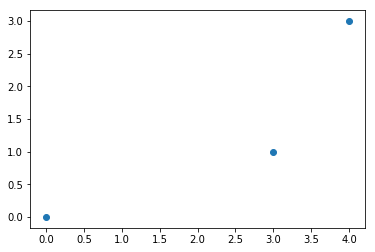

In [14]:
x = points[:,0]
y = points[:,1]
plt.scatter(x,y)

各点間の距離を距離行列で表す。

In [15]:
from scipy.spatial import distance
# 各点間のユークリッド距離を求める
dist_points = distance.cdist(points, points, metric='euclidean')
dist_points

array([[0.        , 3.16227766, 5.        ],
       [3.16227766, 0.        , 2.23606798],
       [5.        , 2.23606798, 0.        ]])

MDSを実行する。パラメータは次の通り。
* n_components : 次元数
* dissimilarity : 類似度の指標。今回はユークリッド距離
* random_state : ランダムシード

In [16]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, dissimilarity="euclidean", random_state=0)
new_points = mds.fit_transform(points)
new_points

array([[ 1.48362701,  2.22325418],
       [ 0.35422258, -0.78650247],
       [-1.8378496 , -1.43675171]])

描画すると次の通り。

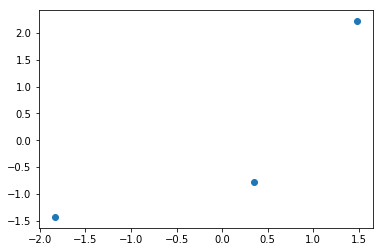

In [17]:
new_x = new_points[:,0]
new_y = new_points[:,1]
plt.scatter(new_x,new_y)

向きが若干変わったが、この点間距離を求めると、元とほぼ同じ距離になっている。

In [18]:
distance.cdist(new_points, new_points, metric='euclidean')

array([[0.        , 3.21468342, 4.94245384],
       [3.21468342, 0.        , 2.286483  ],
       [4.94245384, 2.286483  , 0.        ]])

今回は、
1. 点を与える
2. 点間距離を求める
3. MDSで点を求める
という手順を踏み、最初の点と、MDSで求めた点が（各点との距離が同じという意味で）同一の物を得られた。

一般には、相互関係が分かっているものを可視化するために用いられる。今回は2次元であったが、例えば100次元のデータを人間が直感的に理解するのは難しい。100次元を2次元（あるいは3次元）上に描画することによって、データの関連性を分かりやすくすることができる。

#### iris_dataset
有名なデータセットで実験

In [8]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

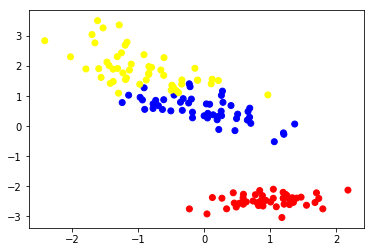

In [9]:
mds = manifold.MDS(n_components=2, dissimilarity="euclidean", random_state=0)
new_points = mds.fit_transform(iris_dataset['data'])

from matplotlib.colors import ListedColormap
colors = ['red','blue','yellow']
cmap = ListedColormap(colors)
plt.scatter(new_points[:, 0], new_points[:, 1], c=iris_dataset['target'], cmap=cmap)

それなりによさげに見える。
ついでに、3次元でもやってみる。

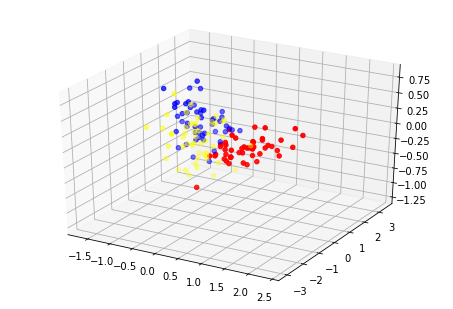

In [10]:
mds = manifold.MDS(n_components=3, dissimilarity="euclidean", random_state=0)
new_points = mds.fit_transform(iris_dataset['data'])

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.colors import ListedColormap
colors = ['red','blue','yellow']
cmap = ListedColormap(colors)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(new_points[:, 0], new_points[:, 1], new_points[:, 2], c=iris_dataset['target'], cmap=cmap)

分かり辛いか……

### ref

* http://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html